<a href="https://colab.research.google.com/github/SarthakNarayan/DL-and-ML/blob/master/googlecolab/SemanticSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Semantic Segmentation
Semantic Segmentation is an image analysis task in which we classify each pixel in the image into a class.<br/>
Trained on Pascal VOC dataset with 20 classes excluding the background.


In [0]:
import torch
import torchvision
from torchvision import transforms , models
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [0]:
fcn_segemntation = models.segmentation.fcn_resnet101(pretrained = True)
deeplab = models.segmentation.deeplabv3_resnet101(True)
fcn_segemntation.eval()
deeplab.eval()

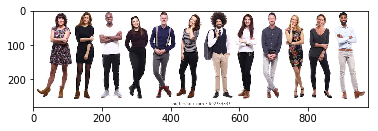

In [38]:
image = Image.open("/content/people")
plt.imshow(image)

In [0]:
# preprocessing the image
transform = transforms.Compose([transforms.Resize(256),
                 transforms.CenterCrop(224),
                 transforms.ToTensor(), 
                 transforms.Normalize(mean = [0.485, 0.456, 0.406], 
                             std = [0.229, 0.224, 0.225])])

input_image = transform(image).unsqueeze(0)

In [0]:
# forward pass
#  The output of the model is a OrderedDict so we need to take 
#  the out key from that to get the output of the model.

output1 = fcn_segemntation(input_image)
output2 = deeplab(input_image)
# you can see it is an ordered dict
# print(output)
output1 = output1['out']
output2 = output2['out']
print(output1.shape)
print(output2.shape)
# we see there are 21 channels
# Since it was trained on 21 classes

In [41]:
# We take a max index for each pixel position, which represents the class.
out_image = torch.argmax(output1.squeeze() , dim = 0).detach().cpu().numpy()
print(out_image.shape)

(224, 224)


we have to create an RGB image from the 2D image we have. So, what we do is that we create empty 2D matrices for all 3 channels.

So, r, g, and b are arrays which will form the RGB channels for the final image and each of these arrays is of shape [H x W] (which is the same as the shape of the 2Dimage).

Now, we loop over each class color we stored in label_colors and we get the indexes in the image where that particular class label is present. Then for each channel, we put its corresponding color to those pixels where that class label is present.

Finally, we stack the 3 separate channels to form a RGB image.

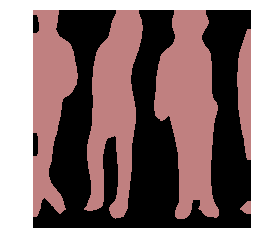

In [52]:
# decoding the image
def decode_segmap(image, nc=21):

    label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

    r = np.zeros_like(image).astype(np.uint8)
    g = np.zeros_like(image).astype(np.uint8)
    b = np.zeros_like(image).astype(np.uint8)

    for l in range(0, nc):
        idx = image == l
        r[idx] = label_colors[l, 0]
        g[idx] = label_colors[l, 1]
        b[idx] = label_colors[l, 2]

    rgb = np.stack([r, g, b], axis=2)
    return rgb

image = decode_segmap(out_image)
plt.imshow(image)
plt.axis('off')
plt.show()